# Jezzrel Aladdin S. Sambaan
# BSIT-4R5

Need to run the code using CNN for Multi-classification, the same dataset for the sample multi-class classification, and screen capture the code and output of each task.

1) Load the dataset (5pts)

2) Define the model with additional hidden layer (10 pts)

    # hidden layer 2

    model.add(Conv2D(filters = 8, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.25))

 3) Compile the model (5 pts)

4) Get the model summary (5 pts)

5) Perform data augmentation (5 pts)

6) fit the model using 15 epochs and batch size = 100 (10 pts)

7) Plot the confusion matrix (10 pts)

Save and upload as a pdf file.

In [ ]:
# !pip install tensorflow keras
# uncomment line above if keras and tensorflow is not installed on your machine/colab

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

## 1) Load the dataset

In [4]:
train = pd.read_csv("CNNtrain.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test = pd.read_csv("CNNtest.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# put labels into y_train variable
Y_train = train["label"]
# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

In [9]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [10]:
# Reshape
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [12]:
Y_train = to_categorical(Y_train, num_classes = 10)

In [13]:
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, 
                                                  Y_train, 
                                                  test_size = 0.1, 
                                                  random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


## 2) Define the model with additional hidden layer

In [16]:
model = Sequential()
# input layer
model.add(Conv2D(filters = 8, kernel_size = (7,7),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# hidden layer 1
model.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# hidden layer 2
model.add(Conv2D(filters = 8, kernel_size = (3,3),padding = 'Same', 
                activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

## 3) Compile the model

In [17]:
# Define the optimizer
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [18]:
# Compile the model
model.compile(optimizer = optimizer , 
              loss = "categorical_crossentropy", 
              metrics=["accuracy"])

In [23]:
epochs = 15  # for better result increase the epochs
batch_size = 100

## 4) Get the model summary

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 8)         400       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 8)        0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 8)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 16)        3216      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 7, 7, 16)         

## 5) Perform data augmentation

In [25]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

## 6) fit the model using 15 epochs and batch size = 100

In [26]:
history = model.fit(datagen.flow(X_train,Y_train, batch_size=batch_size),
                    epochs = epochs, 
                    validation_data = (X_val,Y_val), 
                    steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/15
  1/378 [..............................] - ETA: 22:10 - loss: 2.3059 - accuracy: 0.1100

2022-12-03 00:39:05.040553: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 25824960 exceeds 10% of free system memory.
2022-12-03 00:39:05.041982: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 25824960 exceeds 10% of free system memory.
2022-12-03 00:39:05.049111: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 27126400 exceeds 10% of free system memory.
2022-12-03 00:39:05.049336: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 27126400 exceeds 10% of free system memory.
2022-12-03 00:39:05.082245: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 26891200 exceeds 10% of free system memory.


378/378 [==============================] - 46s 112ms/step - loss: 1.1977 - accuracy: 0.5860 - val_loss: 0.2466 - val_accuracy: 0.9348
Epoch 2/15
378/378 [==============================] - 42s 110ms/step - loss: 0.5091 - accuracy: 0.8387 - val_loss: 0.1669 - val_accuracy: 0.9538
Epoch 3/15
378/378 [==============================] - 41s 108ms/step - loss: 0.3898 - accuracy: 0.8808 - val_loss: 0.1527 - val_accuracy: 0.9550
Epoch 4/15
378/378 [==============================] - 41s 109ms/step - loss: 0.3331 - accuracy: 0.8969 - val_loss: 0.1155 - val_accuracy: 0.9636
Epoch 5/15
378/378 [==============================] - 41s 108ms/step - loss: 0.3004 - accuracy: 0.9103 - val_loss: 0.1124 - val_accuracy: 0.9638
Epoch 6/15
378/378 [==============================] - 42s 110ms/step - loss: 0.2735 - accuracy: 0.9147 - val_loss: 0.0977 - val_accuracy: 0.9698
Epoch 7/15
378/378 [==============================] - 40s 104ms/step - loss: 0.2546 - accuracy: 0.9224 - val_loss: 0.0894 - val_accuracy: 0.9

## 7) Plot the confusion matrix

132/132 [==============================] - 2s 13ms/step


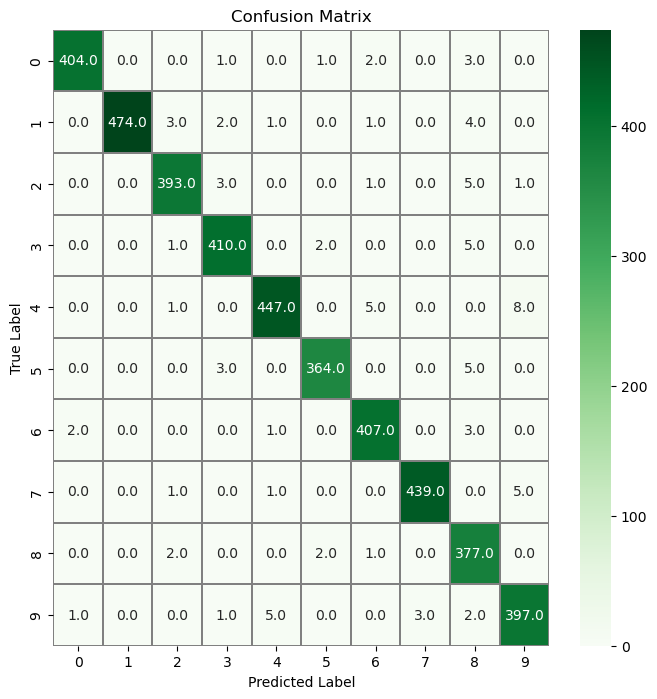

In [33]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,
            cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()